In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436590

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436590

In [9]:
model = keras.models.load_model('modelos/modeloGeneral/stacked_NO_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436590

13644/13644 [==============================] - 118s 9ms/step


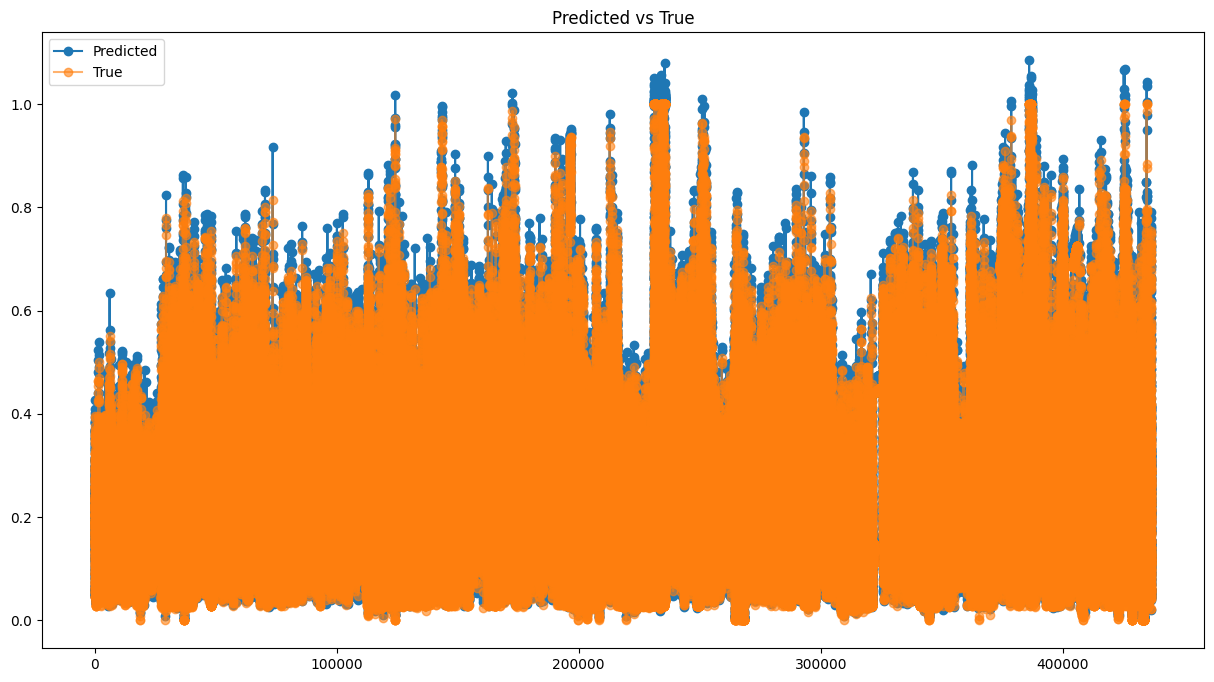

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.028796296388752952,
 'mse': 0.04043663527531249,
 'rmse': 0.0016351214723886462}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          149.617126
1          147.176849
2          144.214661
3          143.837250
4          144.859726
...               ...
436585      85.615479
436586     132.933243
436587     173.081329
436588     212.777863
436589     214.077072

[436590 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436585          137.0
436586          177.0
436587          198.0
436588          216.0
436589          233.0

[436590 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  149.617126
2023-01-01 00:15:00   140.0  147.176849
2023-01-01 00:30:00   139.0  144.214661
2023-01-01 00:45:00   145.0  143.837250
2023-01-01 01:00:00   159.0  144.859726
...                     ...         ...
2035-06-14 18:15:00   137.0   85.615479
2035-06-14 18:30:00   177.0  132.933243
2035-06-14 18:45:00   198.0  173.081329
2035-06-14 19:00:00   216.0  212.777863
2035-06-14 19:15:00   233.0  214.077072

[436590 rows x 2 columns]

AP, BE, EP: (0.9116308473186452, 0.0693031661356562, 0.019065986545698587)


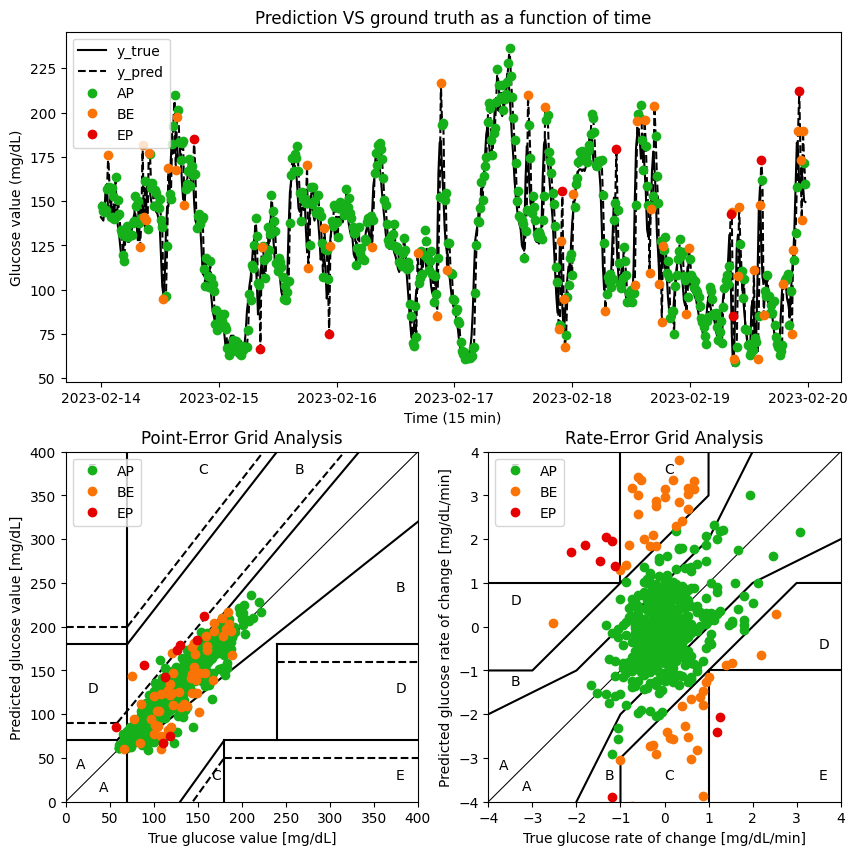

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-14 00:00:00   141.0  149.617126       NaN       NaN    NaN   
1      2023-02-14 00:15:00   140.0  147.176849 -0.066667 -0.162685     AP   
2      2023-02-14 00:30:00   139.0  144.214661 -0.066667 -0.197479     AP   
3      2023-02-14 00:45:00   145.0  143.837250  0.400000 -0.025161     AP   
4      2023-02-14 01:00:00   159.0  144.859726  0.933333  0.068165     AP   
...                    ...     ...         ...       ...       ...    ...   
436585 2035-07-28 18:15:00   137.0   85.615479  2.333333 -0.129403     BE   
436586 2035-07-28 18:30:00   177.0  132.933243  2.666667  3.154518     AP   
436587 2035-07-28 18:45:00   198.0  173.081329  1.400000  2.676539     AP   
436588 2035-07-28 19:00:00   216.0  212.777863  1.200000  2.646435     AP   
436589 2035-07-28 19:15:00   233.0  214.077072  1.133333  0.086614     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436585     B    lD  
436586     A     A  
436587     A     A  
436588     A     B  
436589     A     B  

[436590 rows x 8 columns]

# Predicción a 60 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 31ms/step


Glucose level Predict  Glucose level True
0               0.238298            0.219565
1               0.232993            0.217391

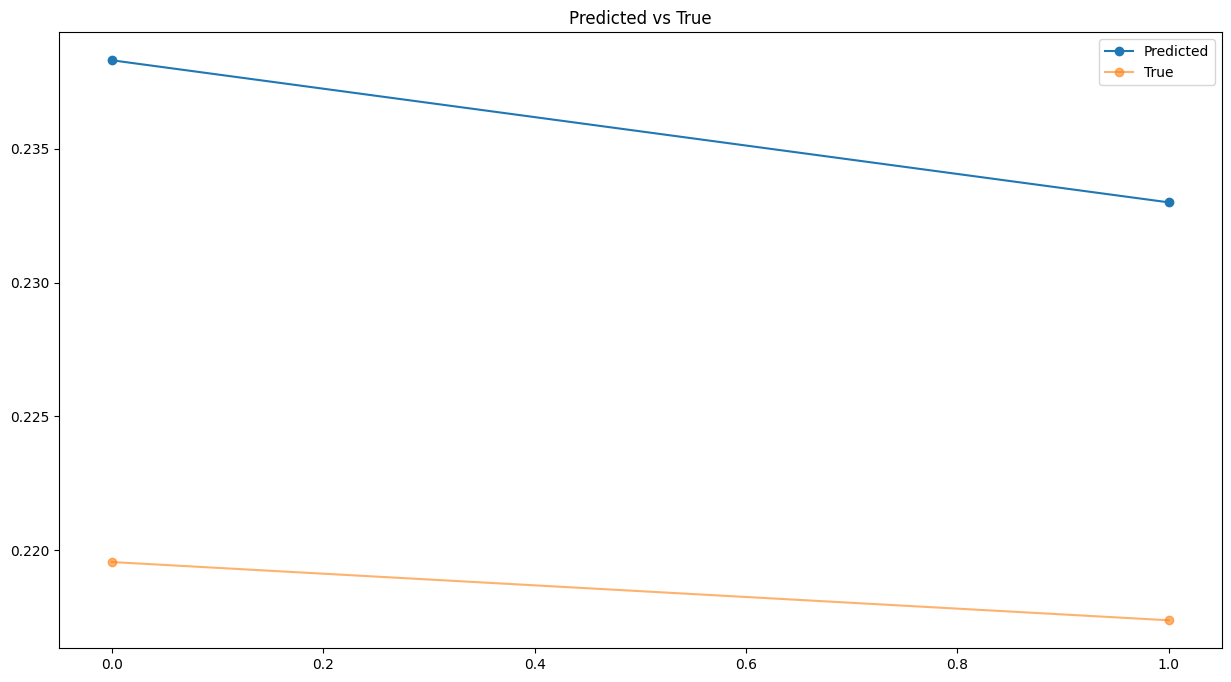

{'mae': 0.01716735369485356,
 'mse': 0.017238585510802505,
 'rmse': 0.0002971688304132501}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             149.617111               141.0
1             147.176849               140.0

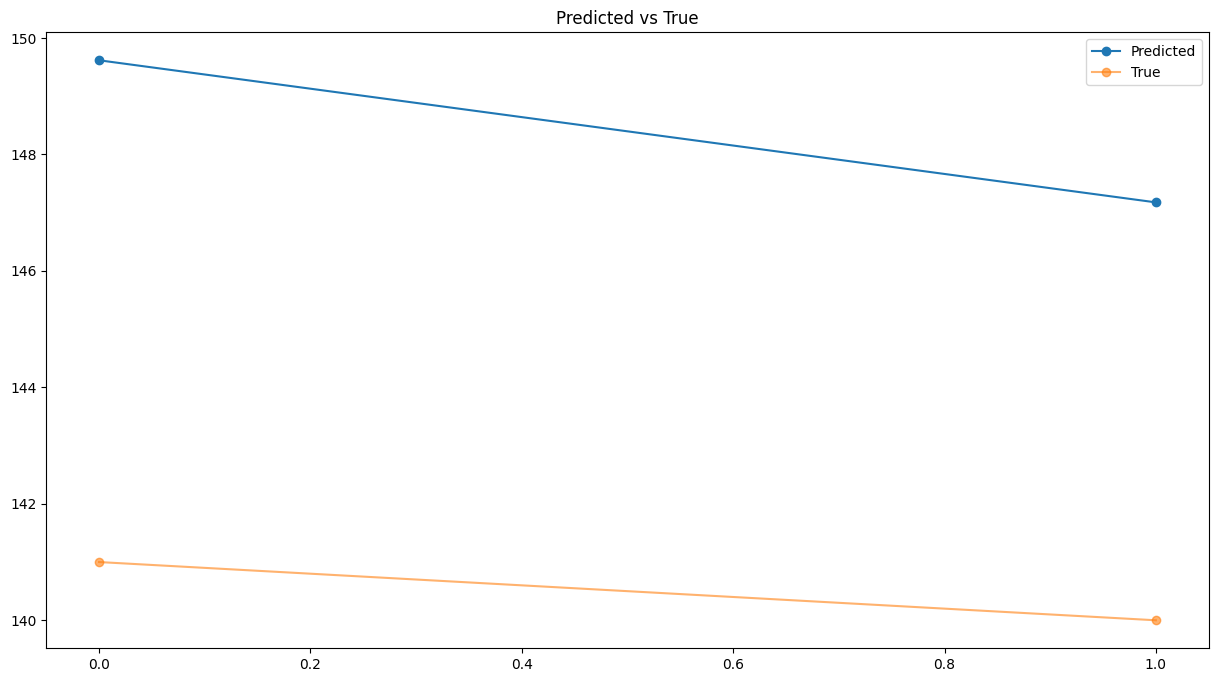

{'mae': 7.896980285644531, 'mse': 7.929746917423604, 'rmse': 62.88088617438916}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 60 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 20ms/step


Glucose level Predict  Glucose level True
0               0.238298            0.219565
1               0.263408            0.217391

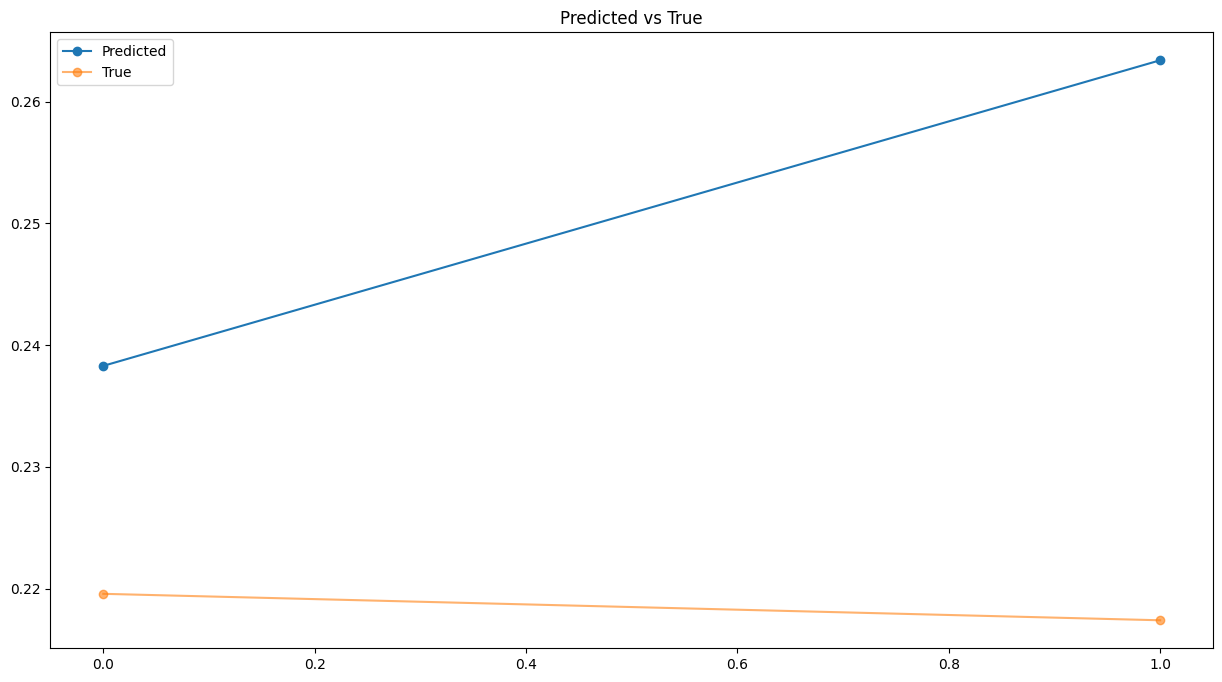

{'mae': 0.03237498707097508,
 'mse': 0.03513184757926817,
 'rmse': 0.0012342467143329305}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             149.617126               141.0
1             161.167862               140.0

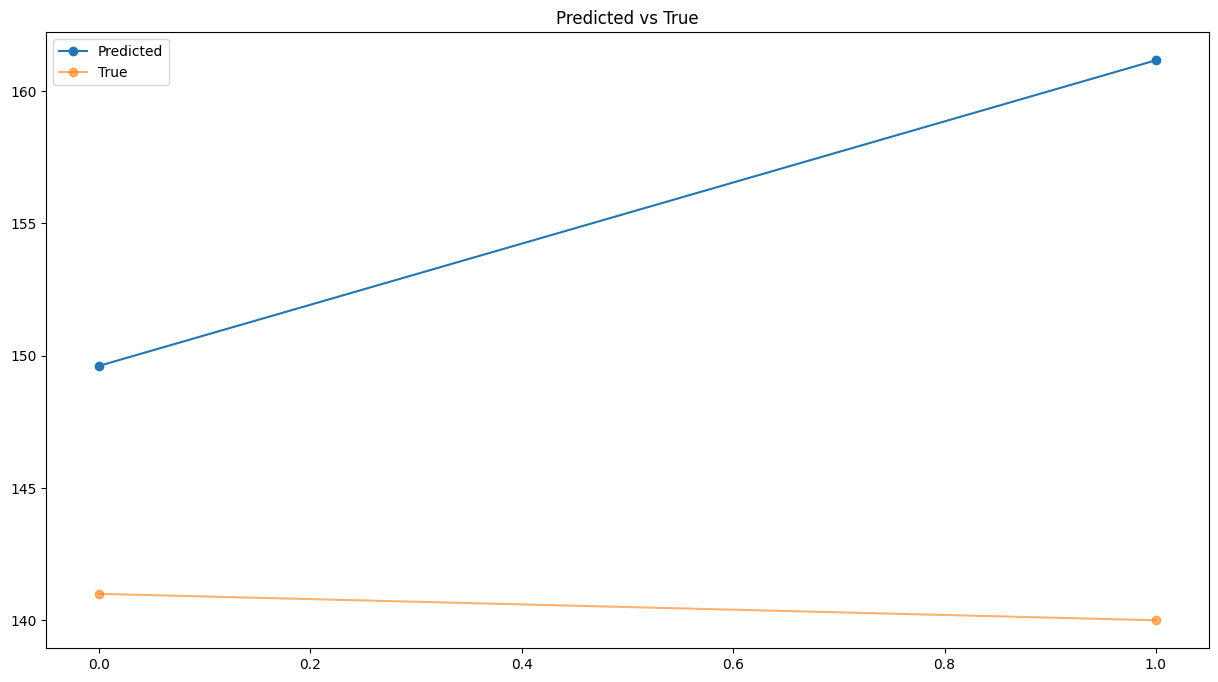

{'mae': 14.892494201660156,
 'mse': 16.160650475112618,
 'rmse': 261.16662377875764}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 6ms/step


Glucose level Predict  Glucose level True
0               0.273391            0.182609
1               0.240904            0.154348
2               0.116753            0.152174
3               0.167886            0.150000
4               0.155946            0.123913

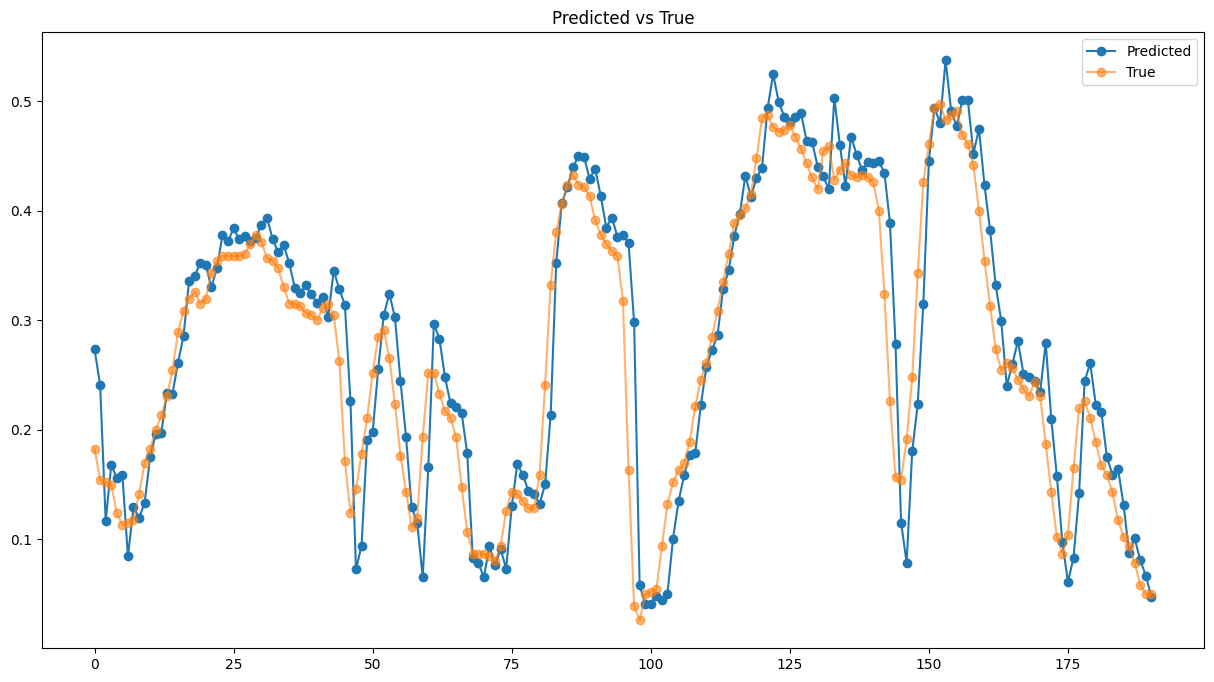

{'mae': 0.03614706449836472,
 'mse': 0.051587330169316874,
 'rmse': 0.002661252633998111}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

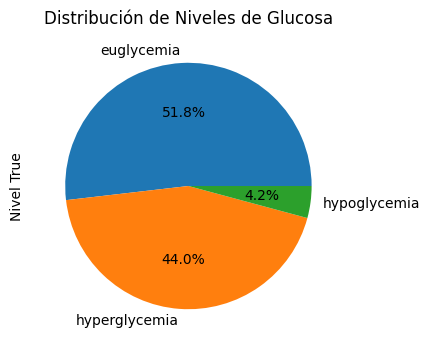

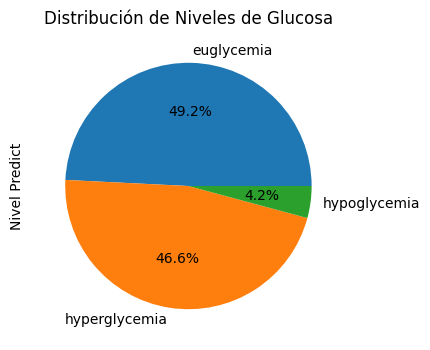

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             165.759827    euglycemia
1               111.0  euglycemia             150.815872    euglycemia
2               110.0  euglycemia              93.706429    euglycemia
3               109.0  euglycemia             117.227547    euglycemia
4                97.0  euglycemia             111.735245    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


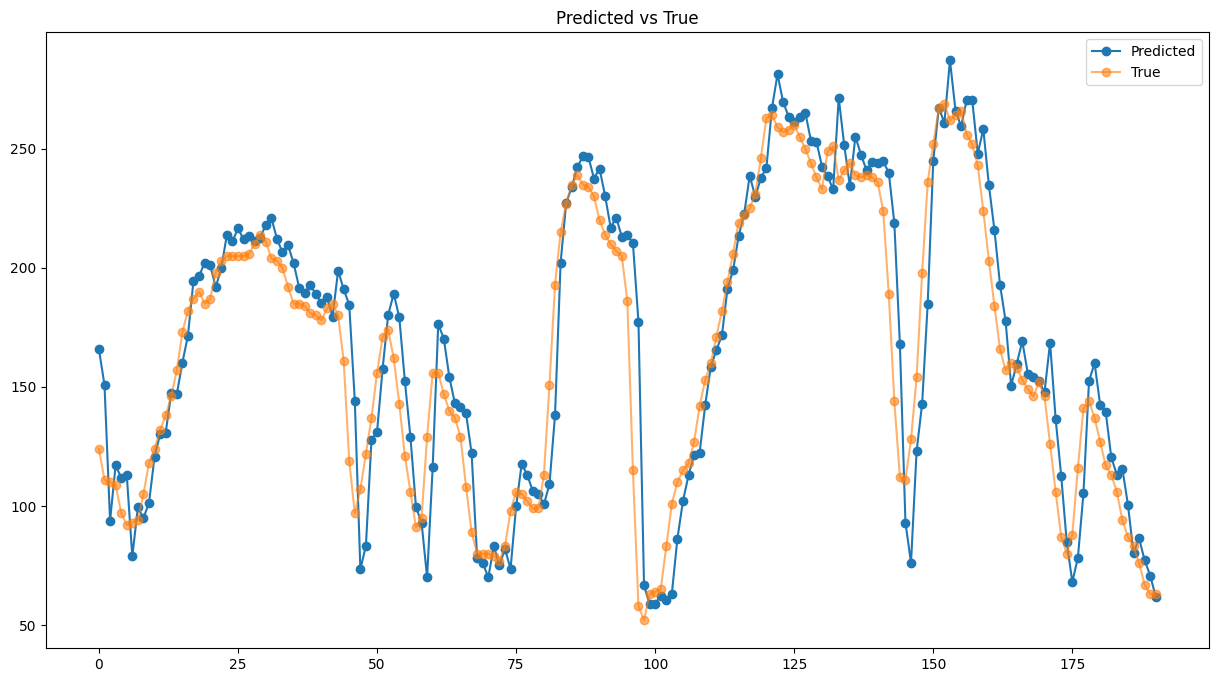

{'mae': 16.62764889782012,
 'mse': 23.730171866723445,
 'rmse': 563.1210568242328}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  165.759827
2023-01-01 00:15:00   111.0  150.815872
2023-01-01 00:30:00   110.0   93.706429
2023-01-01 00:45:00   109.0  117.227547
2023-01-01 01:00:00    97.0  111.735245
...                     ...         ...
2023-01-02 22:30:00    83.0   80.298485
2023-01-02 22:45:00    76.0   86.364616
2023-01-02 23:00:00    67.0   77.242714
2023-01-02 23:15:00    63.0   70.773819
2023-01-02 23:30:00    63.0   61.883152

[191 rows x 2 columns]

AP, BE, EP: (0.9052631578947369, 0.07368421052631578, 0.021052631578947368)


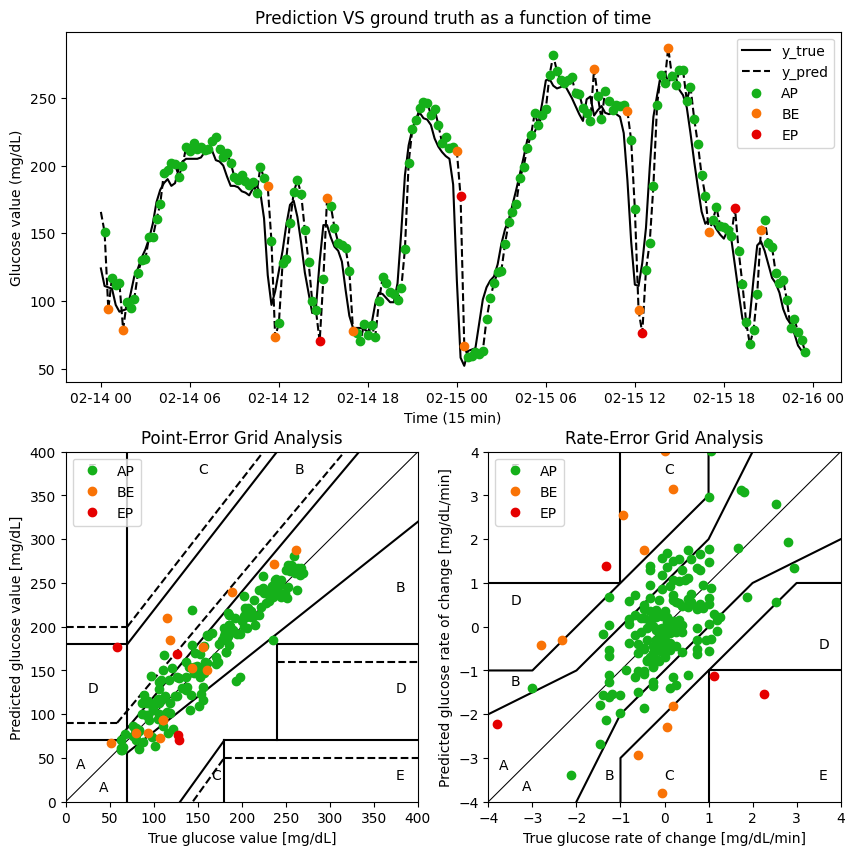

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 7ms/step


Glucose level Predict  Glucose level True
0               0.344628            0.373913
1               0.388543            0.400000
2               0.410403            0.404348
3               0.436307            0.406522
4               0.415454            0.397826

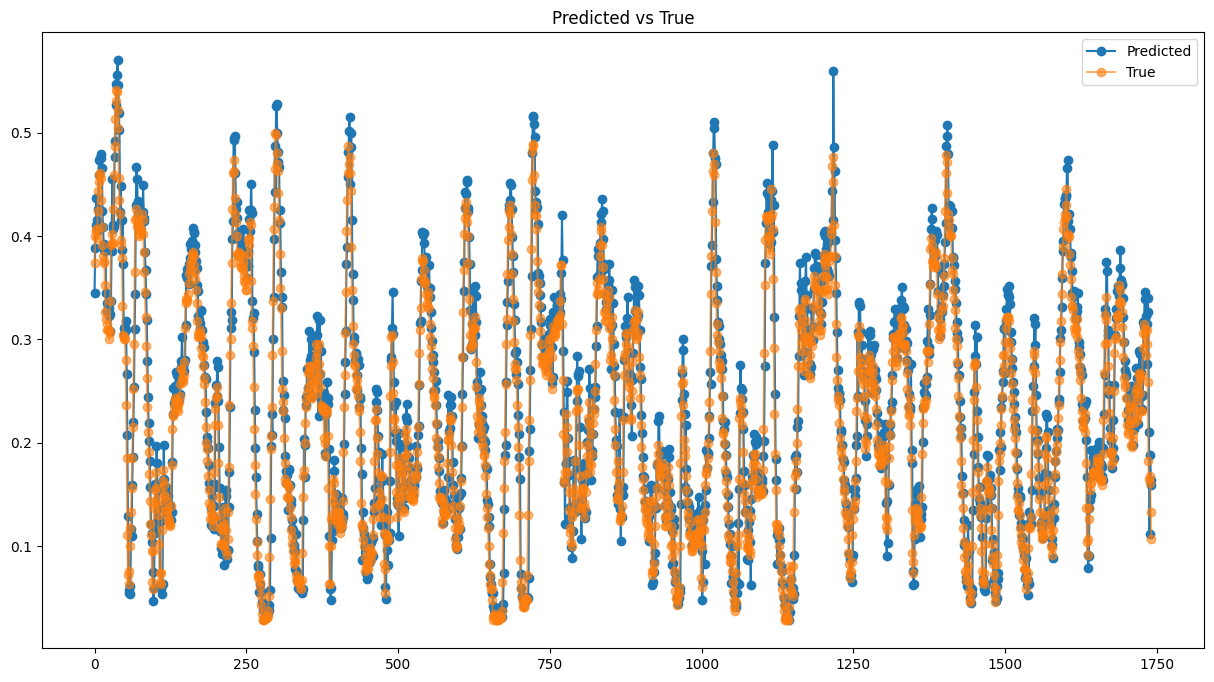

{'mae': 0.025008095219751413,
 'mse': 0.032006177580494996,
 'rmse': 0.0010243954033141804}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

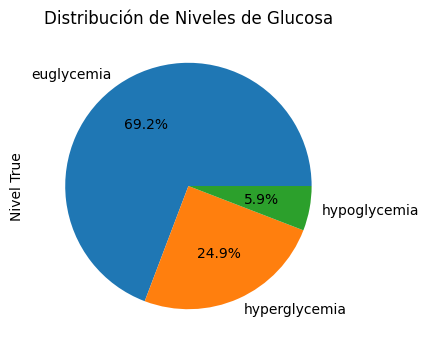

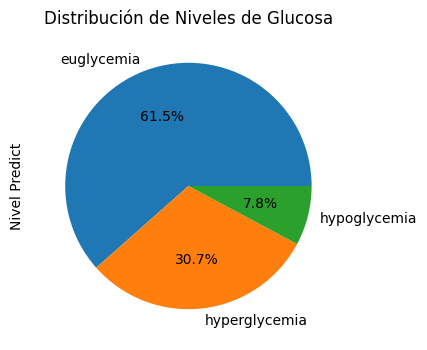

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             198.528976  hyperglycemia
1               224.0  hyperglycemia             218.729568  hyperglycemia
2               226.0  hyperglycemia             228.785522  hyperglycemia
3               227.0  hyperglycemia             240.701385  hyperglycemia
4               223.0  hyperglycemia             231.108734  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


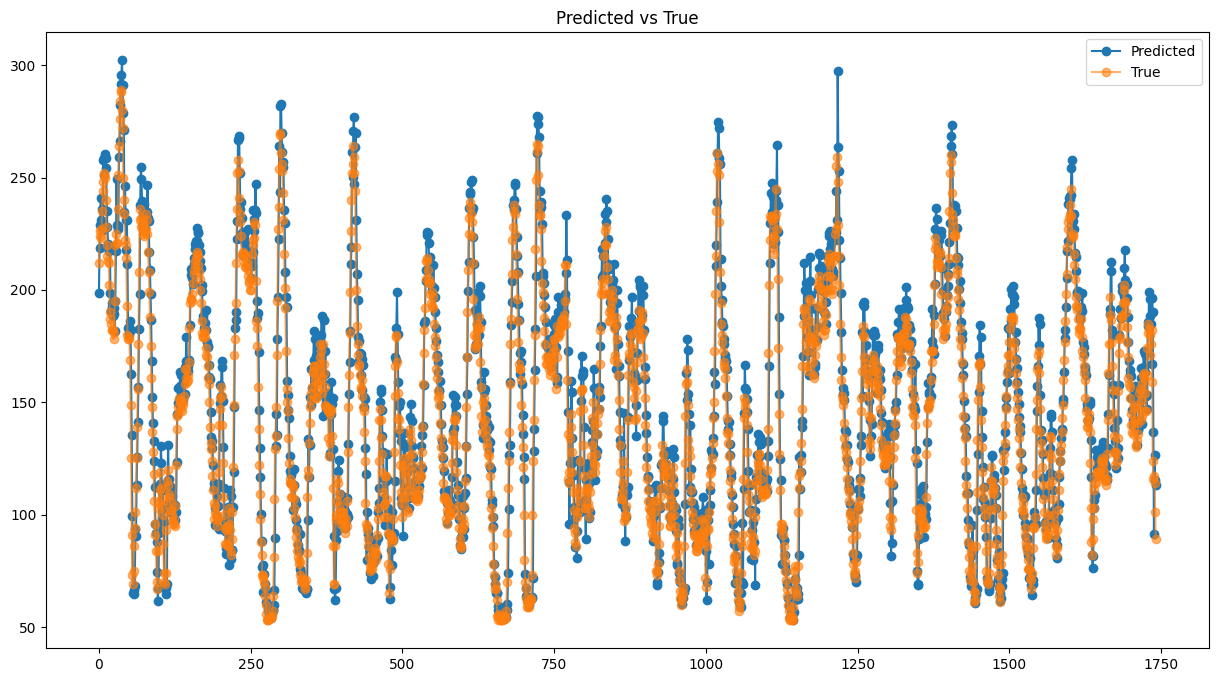

{'mae': 11.503723883820458, 'mse': 14.722841654426974, 'rmse': 216.76206638133}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  198.528976
2023-01-01 00:15:00   224.0  218.729568
2023-01-01 00:30:00   226.0  228.785522
2023-01-01 00:45:00   227.0  240.701385
2023-01-01 01:00:00   223.0  231.108734
...                     ...         ...
2023-01-19 02:15:00   116.0  136.709579
2023-01-19 02:30:00   117.0   91.348297
2023-01-19 02:45:00   114.0  126.596886
2023-01-19 03:00:00   101.0  115.235168
2023-01-19 03:15:00    89.0  113.016800

[1742 rows x 2 columns]

AP, BE, EP: (0.9586444572085009, 0.03331418724870764, 0.0080413555427915)


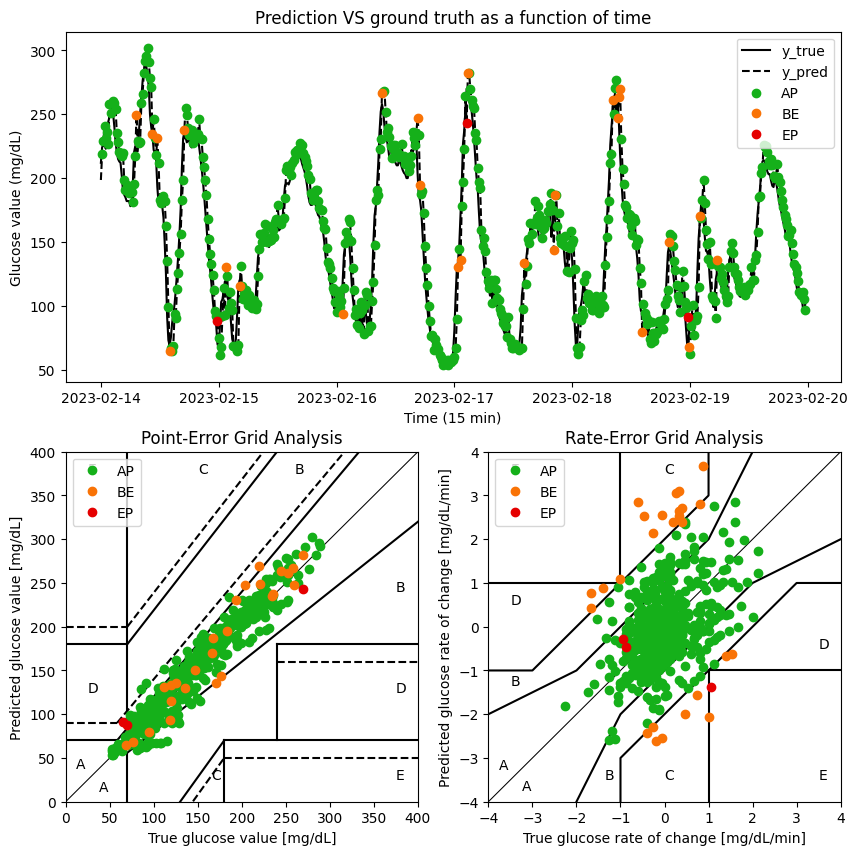

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 8ms/step


Glucose level Predict  Glucose level True
0               0.320808            0.261858
1               0.275852            0.229051
2               0.236921            0.196245
3               0.214009            0.163439
4               0.165932            0.130632

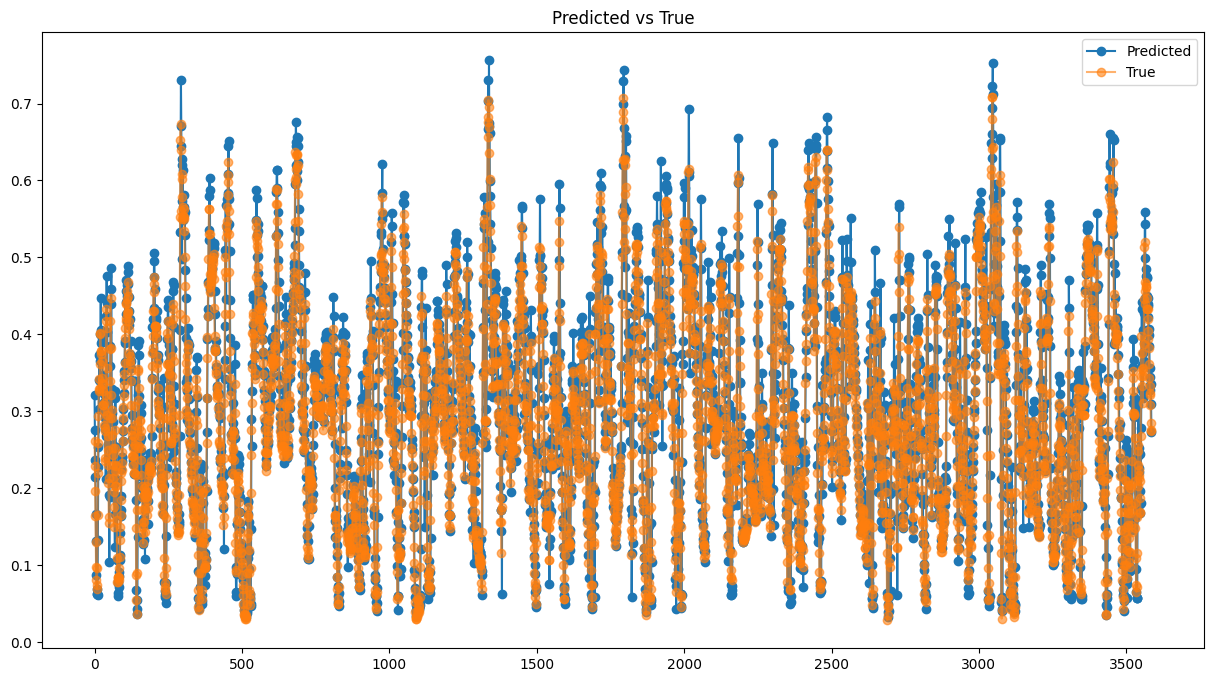

{'mae': 0.03745175223220535,
 'mse': 0.050996269290592026,
 'rmse': 0.0026006194815585792}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

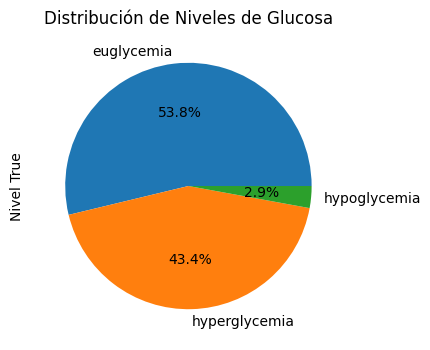

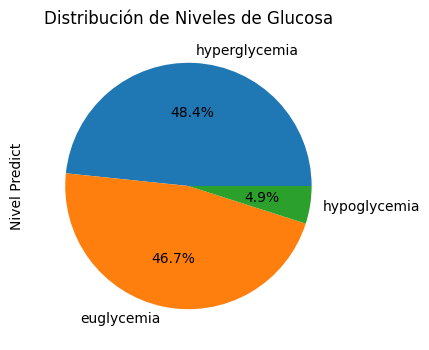

Glucose level True  Nivel True  Glucose level Predict  Nivel Predict
0          160.454545  euglycemia             187.571793  hyperglycemia
1          145.363636  euglycemia             166.891846     euglycemia
2          130.272727  euglycemia             148.983582     euglycemia
3          115.181818  euglycemia             138.444000     euglycemia
4          100.090909  euglycemia             116.328545     euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


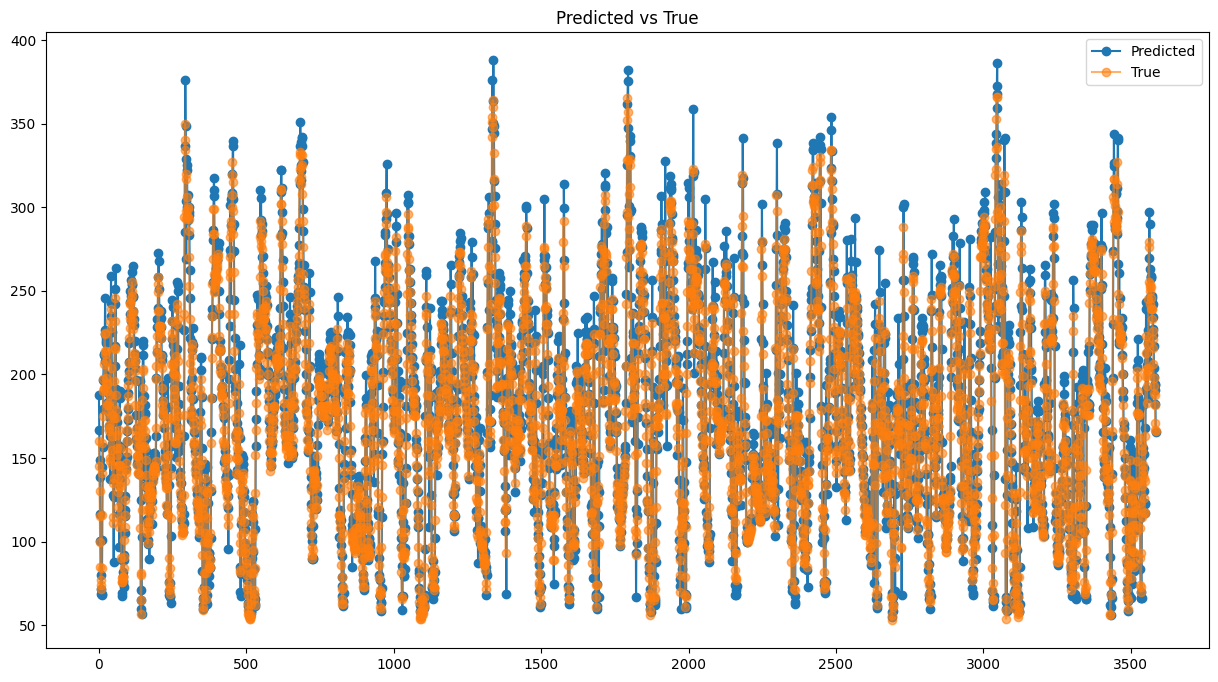

{'mae': 17.22780560155793,
 'mse': 23.458283177707028,
 'rmse': 550.2910496454925}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  187.571793
2023-01-01 00:15:00  145.363636  166.891846
2023-01-01 00:30:00  130.272727  148.983582
2023-01-01 00:45:00  115.181818  138.444000
2023-01-01 01:00:00  100.090909  116.328545
...                         ...         ...
2023-02-07 07:15:00  188.000000  193.810349
2023-02-07 07:30:00  182.000000  190.513702
2023-02-07 07:45:00  171.000000  194.314178
2023-02-07 08:00:00  167.000000  182.473007
2023-02-07 08:15:00  166.000000  165.460632

[3586 rows x 2 columns]

AP, BE, EP: (0.8711297071129707, 0.09400278940027894, 0.03486750348675035)


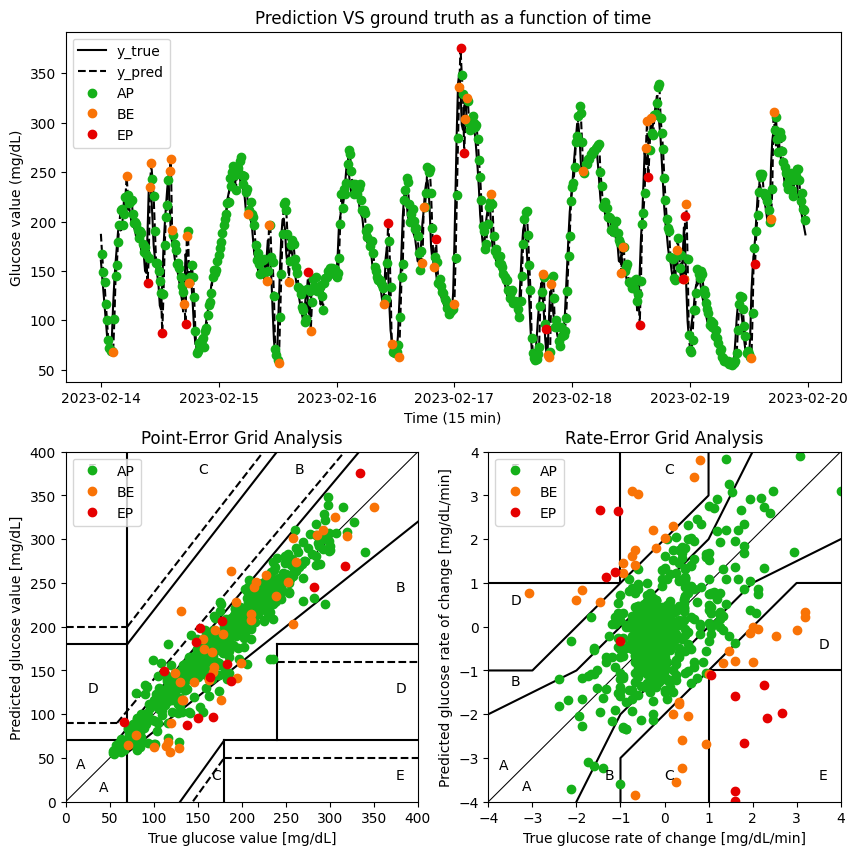

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 2s 8ms/step


Glucose level Predict  Glucose level True
0               0.553889            0.534783
1               0.564197            0.500000
2               0.540405            0.484783
3               0.479661            0.463043
4               0.495023            0.428261

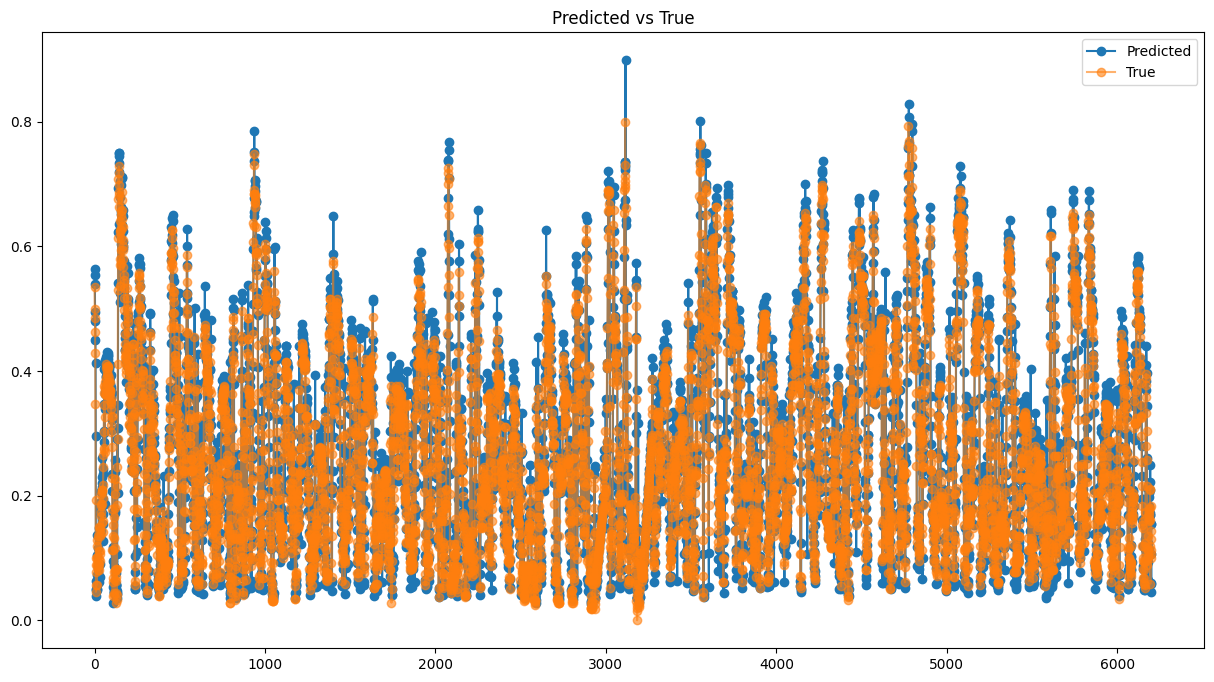

{'mae': 0.040398531299896165,
 'mse': 0.05664473584384366,
 'rmse': 0.0032086260988188273}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

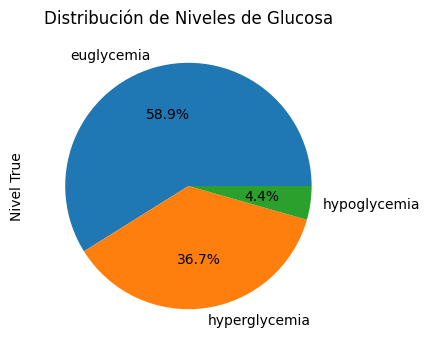

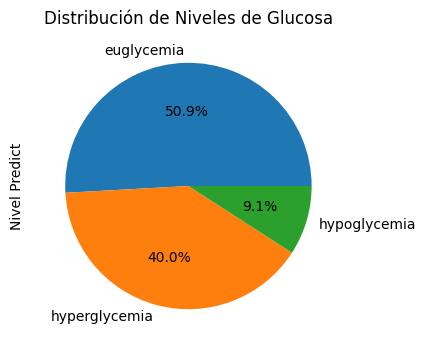

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             294.788818  hyperglycemia
1               270.0  hyperglycemia             299.530762  hyperglycemia
2               263.0  hyperglycemia             288.586456  hyperglycemia
3               253.0  hyperglycemia             260.643982  hyperglycemia
4               237.0  hyperglycemia             267.710663  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


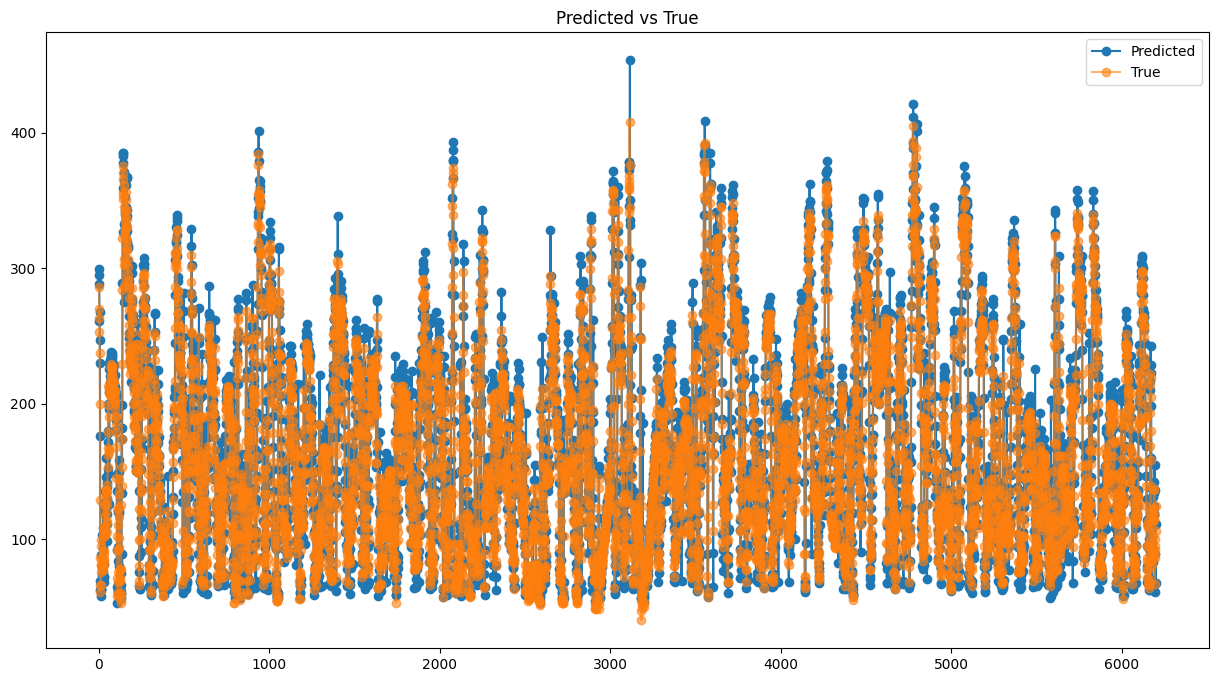

{'mae': 18.58332380734744,
 'mse': 26.056578007863454,
 'rmse': 678.9452574798735}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  294.788818
2023-01-01 00:15:00   270.0  299.530762
2023-01-01 00:30:00   263.0  288.586456
2023-01-01 00:45:00   253.0  260.643982
2023-01-01 01:00:00   237.0  267.710663
...                     ...         ...
2023-03-06 13:00:00   100.0   61.165195
2023-03-06 13:15:00    89.0  111.354630
2023-03-06 13:30:00    92.0   88.671280
2023-03-06 13:45:00   106.0   67.691986
2023-03-06 14:00:00   124.0  111.275146

[6201 rows x 2 columns]

AP, BE, EP: (0.8282258064516129, 0.12516129032258064, 0.046612903225806454)


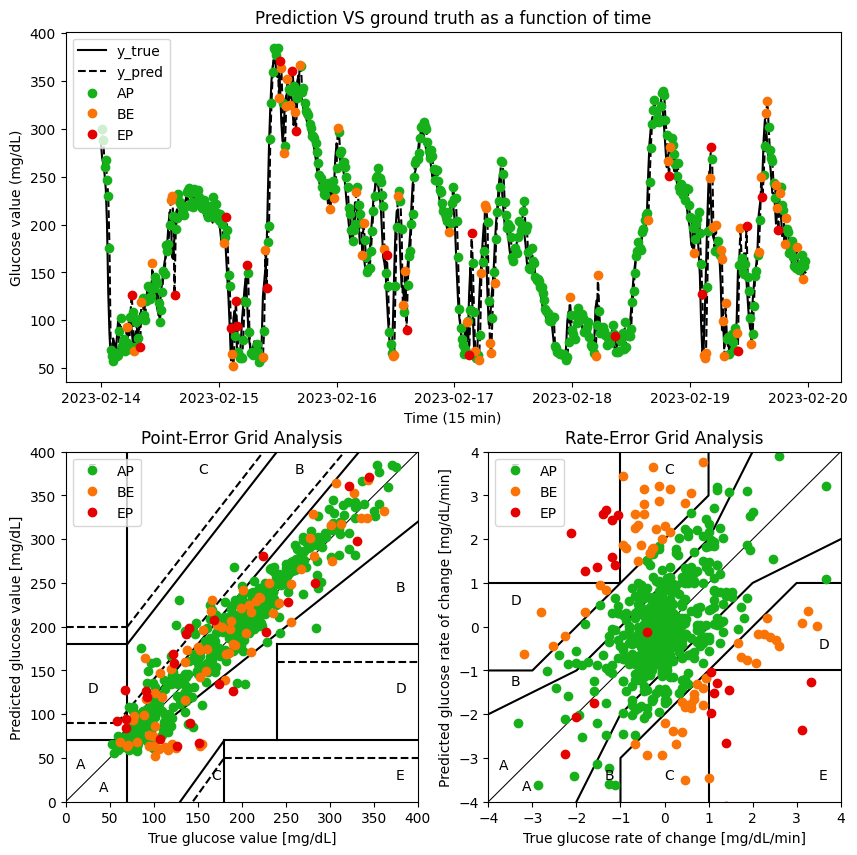

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)